In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
df=pd.read_csv("https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv")
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


<AxesSubplot:xlabel='median_income', ylabel='Count'>

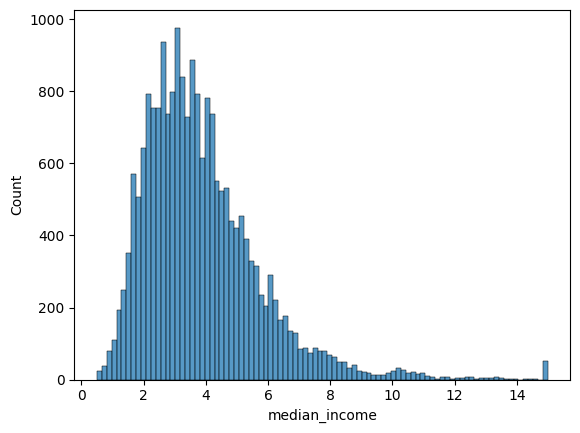

In [40]:
sns.histplot(df['median_income'])

In [1]:
from housing.util.util import load_object

model = load_object(file_path='/home/admin/Desktop/project_task_extra/Project/Housing_Price_Prediction/saved_models/20230404183912/model.pkl')
model

GradientBoostingRegressor()

In [4]:
model.preprocessing_object

ColumnTransformer(transformers=[('num_pipeline',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('feature_generator',
                                                  FeatureGenerator(columns=['longitude',
                                                                            'latitude',
                                                                            'housing_median_age',
                                                                            'total_rooms',
                                                                            'total_bedrooms',
                                                                            'population',
                                                                            'households',
                                                                            'median_income'])),

In [41]:
# df['income_category']=pd.cut(df['median_income'],bins=[0.0,1.5,3.0,4.5,6.0,np.inf],labels=[1,2,3,4,5,])

In [42]:
# df['income_category'].hist()

In [43]:
# sns.histplot(df['median_income'],kde=True)
# plt.show()
# sns.histplot(df['income_category'])
# plt.show()

In [44]:
from sklearn.model_selection import StratifiedShuffleSplit

In [45]:
# split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=4)

# gen=split.split(df,df['income_category'])

In [46]:
# for i,j in gen:
#     print(i,j)

In [47]:
# train_df=df.loc[i]

In [48]:
# test_df=df.loc[j]

In [49]:
from housing.config.configuration import Configuration


p = Configuration('..\config\config.yaml')

print(p.get_data_validation_config())

DataValidationConfig(schema_file_path='d:\\End_to_End_Project\\Housing_Price_Prediction\\notebook\\config\\schema.yaml', report_file_path='d:\\End_to_End_Project\\Housing_Price_Prediction\\notebook\\housing\\artifact\\data_validation\\2023-04-01-23-22\\report.json', report_page_file_path='d:\\End_to_End_Project\\Housing_Price_Prediction\\notebook\\housing\\artifact\\data_validation\\2023-04-01-23-22\\report.html')


In [50]:

import yaml
schema_dict = dict(zip(df.columns, df.dtypes.astype(str)))

# remove the "dtype(" prefix from the data types
schema_dict = {'columns': {k: v.replace('dtype(', '').replace(')', '') for k, v in schema_dict.items(
) if k != 'median_house_value'},'numerical_columns':[col for col in df.columns if df[col].dtype != 'O'] , 'categorical_columns':[col for col in df.columns if df[col].dtype == 'O'], 'target_column': 'median_house_value', 'domain_value': {'ocean_proximity': list(df['ocean_proximity'].unique())}}

# create schema dictionary with only keys and data types
# schema = {k: type(v).__name__ for k,v in schema_dict.items()}

# write schema dictionary to a YAML file
with open('schema.yaml', 'w') as file:
    yaml.dump(schema_dict, file)

In [51]:
schema_dict

{'columns': {'longitude': 'float64',
  'latitude': 'float64',
  'housing_median_age': 'float64',
  'total_rooms': 'float64',
  'total_bedrooms': 'float64',
  'population': 'float64',
  'households': 'float64',
  'median_income': 'float64',
  'ocean_proximity': 'object'},
 'numerical_columns': ['longitude',
  'latitude',
  'housing_median_age',
  'total_rooms',
  'total_bedrooms',
  'population',
  'households',
  'median_income',
  'median_house_value'],
 'categorical_columns': ['ocean_proximity'],
 'target_column': 'median_house_value',
 'domain_value': {'ocean_proximity': ['NEAR BAY',
   '<1H OCEAN',
   'INLAND',
   'NEAR OCEAN',
   'ISLAND']}}

In [52]:
from housing.util.util import read_yaml_file

In [53]:
# schema_file_path = self.data_validation_config.schema_file_path
schema_config = read_yaml_file(
    file_path='..\config\schema.yaml')

train_data = pd.read_csv(r'D:\End_to_End_Project\Housing_Price_Prediction\housing\artifact\data_ingestion\2023-03-28-20-26\ingested_data\train\housing.csv')

test_data = pd.read_csv(r'D:\End_to_End_Project\Housing_Price_Prediction\housing\artifact\data_ingestion\2023-03-28-20-26\ingested_data\test\housing.csv')

schema_dict_train = dict(zip(train_data
                             .columns, train_data.dtypes.astype(str)))

schema_dict_train = {'columns': {k: v.replace('dtype(', '').replace(')', '') for k, v in schema_dict_train.items() if k != 'median_house_value'}, 'target_column': 'median_house_value', 'domain_value': {'ocean_proximity': list(train_data['ocean_proximity'].unique())}}

schema_dict_test = dict(zip(test_data.columns, test_data.dtypes.astype(str)))

schema_dict_test = {'columns': {k: v.replace('dtype(', '').replace(')', '') for k, v in schema_dict_test.items() if k != 'median_house_value'}, 'target_column': 'median_house_value', 'domain_value': {'ocean_proximity': list(test_data['ocean_proximity'].unique())}}

In [54]:
schema_config
((schema_config['target_column']) in (train_data.columns)) and (schema_config['target_column']) in (test_data.columns) 

True

In [55]:
is_target_column_avilable = False
if (schema_config['target_column'] in df) and (schema_config['target_column'] in df):
    is_target_column_avilable = True

In [56]:
from collections import Counter


In [57]:
data_type_of_cols_validate = False
if (Counter(schema_dict['numerical_columns'])) == (Counter([col for col in train_data.columns if train_data[col].dtype != 'O'])) :
    data_type_of_cols_validate=True

data_type_of_cols_validate

True

In [58]:
data_type_of_cols_validate = False
if (Counter(schema_config['numerical_columns'])) == (Counter([col for col in train_data.columns if train_data[col].dtype != 'O'])) \
    :
    data_type_of_cols_validate = True

data_type_of_cols_validate

False

In [59]:
data_type_of_cols_validate = False
if (Counter(schema_config['numerical_columns'])) == (Counter([col for col in test_data.columns if test_data[col].dtype != 'O'])) :
    data_type_of_cols_validate = True

data_type_of_cols_validate

False

In [60]:
(Counter([col for col in test_data.columns if test_data[col].dtype != 'O']))

Counter({'longitude': 1,
         'latitude': 1,
         'housing_median_age': 1,
         'total_rooms': 1,
         'total_bedrooms': 1,
         'population': 1,
         'households': 1,
         'median_income': 1,
         'median_house_value': 1})

In [61]:
(Counter(schema_config['numerical_columns']))

Counter({'longitude': 1,
         'latitude': 1,
         'housing_median_age': 1,
         'total_rooms': 1,
         'total_bedrooms': 1,
         'population': 1,
         'households': 1,
         'median_income': 1})

In [62]:
data_type_of_cols_validate = False
if  (Counter(schema_config['categorical_columns'])) == (Counter([col for col in train_data.columns if test_data[col].dtype == 'O'])) :
    data_type_of_cols_validate = True

data_type_of_cols_validate

True

In [63]:
data_type_of_cols_validate = False
if (Counter(schema_config['categorical_columns'])) == (Counter([col for col in test_data.columns if test_data[col].dtype == 'O'])):
    data_type_of_cols_validate = True

data_type_of_cols_validate

True

In [64]:
from housing.component.data_validation import DataValidation
from housing.config.configuration import Configuration

from housing.entity.artifact_entity import DataValidationArtifact,DataIngestionArtifact
from housing.entity.config_entity import DataIngestionConfig,DataValidationConfig

d:\End_to_End_Project\Housing_Price_Prediction\venv\lib\site-packages\evidently\analyzers\__init__.py:3: UserWarning: analyzers are deprecated, use metrics instead
  warnings.warn("analyzers are deprecated, use metrics instead")
d:\End_to_End_Project\Housing_Price_Prediction\venv\lib\site-packages\evidently\model_profile\__init__.py:8: UserWarning: model profiles are deprecated, use metrics instead
  warnings.warn("model profiles are deprecated, use metrics instead")
d:\End_to_End_Project\Housing_Price_Prediction\venv\lib\site-packages\evidently\dashboard\__init__.py:8: UserWarning: dashboards are deprecated, use metrics instead
  warnings.warn("dashboards are deprecated, use metrics instead")


In [65]:
data_validation_config=Configuration().get_data_validation_config()
data_ingestion_artifact=Configuration().get_data_validation_config()

val=DataValidation()
print(val.initiate_data_validate(data_validation_config,data_ingestion_artifact))

HousingException: Python Script :
    [d:\end_to_end_project\housing_price_prediction\housing\config\configuration.py] 
    at try block line number : [19] and exception block line no : [27] 
    error message : 
    [Python Script :
    [d:\end_to_end_project\housing_price_prediction\housing\util\util.py] 
    at try block line number : [20] and exception block line no : [25] 
    error message : 
    [[Errno 2] No such file or directory: 'd:\\End_to_End_Project\\Housing_Price_Prediction\\notebook\\config\\config.yaml']
    ]
    

In [ ]:
schema_dict['numerical_columns']

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value']

In [ ]:
[col for col in train_data.columns if train_data[col].dtype != 'O']

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value']

In [ ]:
is_target_column_avilable

True

In [ ]:
schema_dict_test

{'columns': {'longitude': 'float64',
  'latitude': 'float64',
  'housing_median_age': 'float64',
  'total_rooms': 'float64',
  'total_bedrooms': 'float64',
  'population': 'float64',
  'households': 'float64',
  'median_income': 'float64',
  'ocean_proximity': 'object'},
 'target_column': 'median_house_value',
 'domain_value': {'ocean_proximity': ['NEAR OCEAN',
   '<1H OCEAN',
   'INLAND',
   'NEAR BAY',
   'ISLAND']}}

AttributeError: 'dict' object has no attribute 'columns'

In [ ]:
schema_dict_train

{'columns': {'longitude': 'float64',
  'latitude': 'float64',
  'housing_median_age': 'float64',
  'total_rooms': 'float64',
  'total_bedrooms': 'float64',
  'population': 'float64',
  'households': 'float64',
  'median_income': 'float64',
  'ocean_proximity': 'object'},
 'target_column': 'median_house_value',
 'domain_value': {'ocean_proximity': ['<1H OCEAN',
   'NEAR BAY',
   'INLAND',
   'NEAR OCEAN',
   'ISLAND']}}

In [ ]:
schema_dict_train  == schema_dict_test

False

In [ ]:
from housing.component.data_validation import DataValidation

In [ ]:
a=DataValidation(Da)

TypeError: __init__() missing 2 required positional arguments: 'data_validation_config' and 'data_ingestion_artifact'

In [ ]:
DeepDiff(schema_dict_train,schema_dict_test)

{'values_changed': {"root['domain_value']['ocean_proximity'][0]": {'new_value': 'NEAR OCEAN',
   'old_value': '<1H OCEAN'},
  "root['domain_value']['ocean_proximity'][1]": {'new_value': '<1H OCEAN',
   'old_value': 'NEAR BAY'},
  "root['domain_value']['ocean_proximity'][3]": {'new_value': 'NEAR BAY',
   'old_value': 'NEAR OCEAN'}}}

In [ ]:
schema_config

NameError: name 'schema_config' is not defined

In [ ]:
d={
    "Brute":[1,2,3,4,5,6],
    "Radical":[4,2,6,4,8,7,6,9,4,9,74],
    "Hitter":[64646,46,65]
}

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv(r'C:\Users\viral\Desktop\1.csv')

In [1]:
d_new = df.to_dict(orient="list",)

print(d_new)


NameError: name 'df' is not defined

In [2]:
import importlib

In [3]:
def class_for_name(module_name:str, class_name:str):
        # load the module, will raise ImportError if module cannot be loaded
        module = importlib.import_module(module_name)
        # get the class, will raise AttributeError if class cannot be found
        # logging.info(f"Executing command: from {module} import {class_name}")
        class_ref = getattr(module,class_name)
        return class_ref

In [4]:
a=class_for_name('sklearn.tree','DecisionTreeRegressor')

In [1]:
import yaml
GRID_SEARCH_KEY = 'grid_search'
MODULE_KEY = 'module'
CLASS_KEY = 'class'
PARAM_KEY = 'params'
MODEL_SELECTION_KEY = 'model_selection'
SEARCH_PARAM_GRID_KEY = "search_param_grid"

In [2]:
def read_params(config_path: str) -> dict:
    with open(config_path) as yaml_file:
        config:dict = yaml.safe_load(yaml_file)
    return config

In [4]:
config= read_params('/home/admin/Desktop/project_task_extra/Project/Housing_Price_Prediction/config/model.yaml')

In [16]:
d=config['model_selection']

In [2]:
import sklearn.ensemble as ensemble

model = ensemble.GradientBoostingRegressor()

print(str(model))


GradientBoostingRegressor()


In [26]:
d['module_0']

{'class': 'LinearRegression',
 'module': 'sklearn.linear_model',
 'params': {'fit_intercept': True},
 'search_param_grid': {'fit_intercept': [True, False]}}

In [24]:
d['module_0']['search_param_grid']

{'fit_intercept': [True, False]}

In [7]:
grid_search_property_data= dict(config[MODEL_SELECTION_KEY])

In [8]:
grid_search_property_data

{'module_0': {'class': 'LinearRegression',
  'module': 'sklearn.linear_model',
  'params': {'fit_intercept': True},
  'search_param_grid': {'fit_intercept': [True, False]}},
 'module_1': {'class': 'Ridge',
  'module': 'sklearn.linear_model',
  'params': {'fit_intercept': True, 'alpha': 1.0},
  'search_param_grid': {'fit_intercept': [True, False],
   'alpha': [0.05, 0.1, 0.2, 0.5, 0.75, 1],
   'solver': ['auto', 'svd', 'lbfgs']}},
 'module_2': {'class': 'Lasso',
  'module': 'sklearn.linear_model',
  'params': {'fit_intercept': True,
   'alpha': 1.0,
   'warm_start': True,
   'selection': 'random'},
  'search_param_grid': {'alpha': [0.05, 0.1, 0.2, 0.5, 0.75, 1],
   'warm_star': [True, False],
   'selection': ['random', 'cyclic']}},
 'module_3': {'class': 'DecisionTreeRegressor',
  'module': 'sklearn.tree',
  'params': {'criterion': 'squared_error',
   'max_depth': 3,
   'min_samples_leaf': 2,
   'max_features': 'auto',
   'max_leaf_nodes': 2},
  'search_param_grid': {'criterion': ['squa

In [10]:
from housing.logger.logger import logging

In [11]:
def update_property_of_class(instance_ref: object, property_data: dict):
    if not isinstance(property_data, dict):
        raise Exception(
            "property_data parameter required to dictionary")
    print(property_data)
    for key, value in property_data.items():
        logging.info(f"Executing:$ {str(instance_ref)}.{key}={value}")
        setattr(instance_ref,key,value)
    return instance_ref

In [12]:
b = update_property_of_class(a,grid_search_property_data)

{'cv': 5, 'verbose': 2}


In [13]:
getattr(b,'verbose')

2